In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
pwd

'/home/titan/sumspark/projects'

In [3]:
df1 = pd.read_csv("/home/titan/dataset//b_h_pricing//Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
# print(df1['location'].unique())
print(len(df1['location'].unique()))

1306


In [8]:
print(df1['size'].unique())
print(len(df1['size'].unique()))

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']
32


In [9]:
print(df1['bath'].unique())
print(len(df1['bath'].unique()))

[ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]
20


In [10]:
print(df1['balcony'].unique())
print(len(df1['balcony'].unique()))

[ 1.  3. nan  2.  0.]
5


In [11]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
df1.shape

(13320, 9)

In [13]:
df3 = df1.dropna()
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Feature engg.

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
print(df3.bhk.unique())
df3.head()


[ 2  4  3  1  5 11  9  6  7]


/home/titan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [15]:
for i,j in enumerate(df3.columns):
    print(j,'==>',type(df3[j][1]))


area_type ==> <class 'str'>
availability ==> <class 'str'>
location ==> <class 'str'>
size ==> <class 'str'>
society ==> <class 'str'>
total_sqft ==> <class 'str'>
bath ==> <class 'numpy.float64'>
balcony ==> <class 'numpy.float64'>
price ==> <class 'numpy.float64'>
bhk ==> <class 'numpy.int64'>


In [16]:

# def is_float(x):
#     try:
#         float(x)
#     except:
#         return False
#     return True

In [17]:
# df3[~df3['total_sqft'].apply(is_float)].head(10)

In [16]:
# df3['total_sqft'].head()
# df3['total_sqft'].apply(pd.to_numeric(errors='coerce'))
pd.to_numeric(df3['total_sqft'],errors='coerce')
print(df3['total_sqft'].isna().sum())

0


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
# df3=df3.drop(['size'],axis=1)
df3.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [19]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3


In [20]:
df4.loc[5]

area_type       Super built-up  Area
availability           Ready To Move
location                  Whitefield
size                           2 BHK
society                      DuenaTa
total_sqft                      1170
bath                               2
balcony                            1
price                             38
bhk                                2
Name: 5, dtype: object

Feature Engineering

In [21]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [22]:
df5_statistics= df5['price_per_sqft'].describe()
df5_statistics

count      7481.000000
mean       5992.058235
std        9160.840277
min         371.428571
25%        4279.131007
50%        5319.148936
75%        6696.629213
max      672727.272727
Name: price_per_sqft, dtype: float64

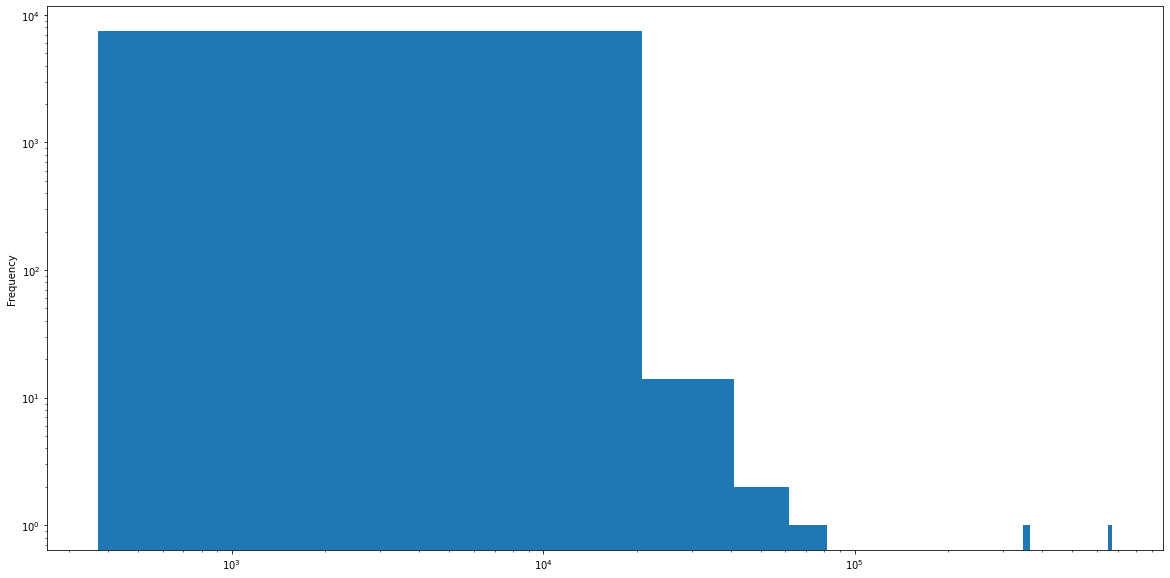

In [23]:
# help(plt)
range=(df5['price_per_sqft'].min(),df5['price_per_sqft'].max())
# plt.hist(df5['price_per_sqft'],bins=33,range=range)
# plt.hist(df5['price_per_sqft'],bins=33,range=range, logx=True)
# plt.plot(df5['price_per_sqft'], logx=True)
df5['price_per_sqft'].plot.hist(bins=33)
plt.xscale('log')
plt.yscale('log')
plt.show()

# plt.loglog()
# print(range)

See the nature of graph...not normally distributed hence many predefined statistical model will fail...
How ever ML model based on neural network can provide beter insight on the matter...esp. if outlier data is to be considered of importance

In [24]:
df5.to_csv("/home/titan/dataset//b_h_pricing//bhp.csv",index=False)

In [25]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield           397
Sarjapur  Road       310
Electronic City      238
Kanakpura Road       216
Thanisandra          214
                    ... 
Mailasandra            1
KSRTC Layout           1
Prakruthi Nagar        1
Anugrah Layout         1
Raghavendra Nagar      1
Name: location, Length: 625, dtype: int64

In [26]:

location_stats.values.sum()

7481

In [27]:
len(location_stats[location_stats>10])

143

In [28]:

len(location_stats[location_stats<=10])

482

Dimensionality Reduction


In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Vidyaranyapura       10
Prithvi Layout       10
Amruthahalli         10
Dairy Circle         10
Mallasandra          10
                     ..
Mailasandra           1
KSRTC Layout          1
Prakruthi Nagar       1
Anugrah Layout        1
Raghavendra Nagar     1
Name: location, Length: 482, dtype: int64

In [30]:
len(df5.location.unique())

625

In [31]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

144

In [32]:
df5[df5.total_sqft/df5.bhk<300].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
349,Plot Area,18-Dec,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3,672727.272727
480,Built-up Area,Ready To Move,other,4 BHK,LiaveEn,1150.0,4.0,2.0,260.0,4,22608.695652
483,Plot Area,Ready To Move,other,5 Bedroom,Bemesrm,1200.0,5.0,2.0,190.0,5,15833.333333
1239,Built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,16.0,2,2909.090909
2040,Super built-up Area,Ready To Move,Electronic City,2 BHK,Itelaa,550.0,1.0,1.0,15.0,2,2727.272727


In [33]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(7439, 11)

In [34]:
df6.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-1.5*st)) & (subdf.price_per_sqft<=(m+1.5*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(6729, 11)

In [36]:
df7['price_per_sqft'].describe()

count     6729.000000
mean      5536.015867
std       1871.847993
min       1250.000000
25%       4267.782427
50%       5235.873510
75%       6470.409712
max      21731.936018
Name: price_per_sqft, dtype: float64

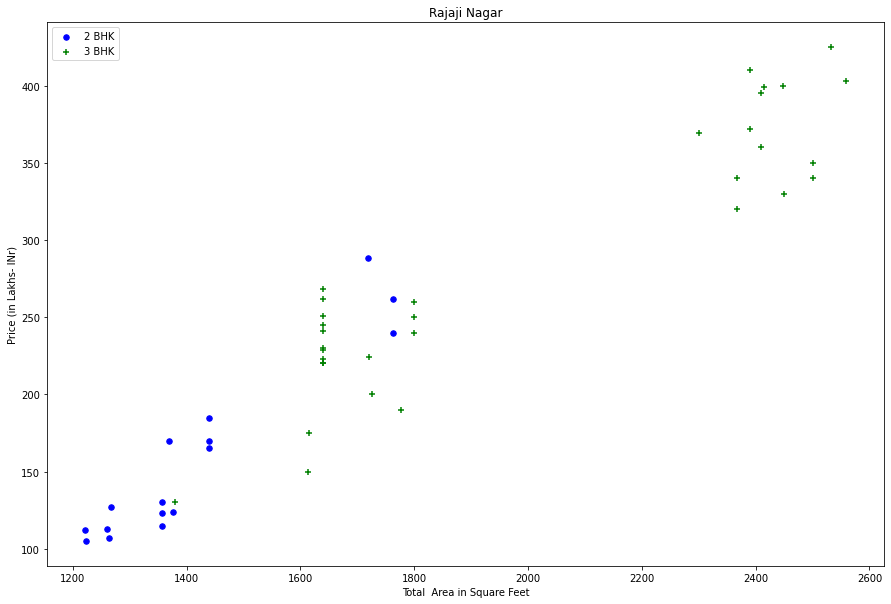

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=30)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=30)
    plt.xlabel("Total  Area in Square Feet")
    plt.ylabel("Price (in Lakhs- INr)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

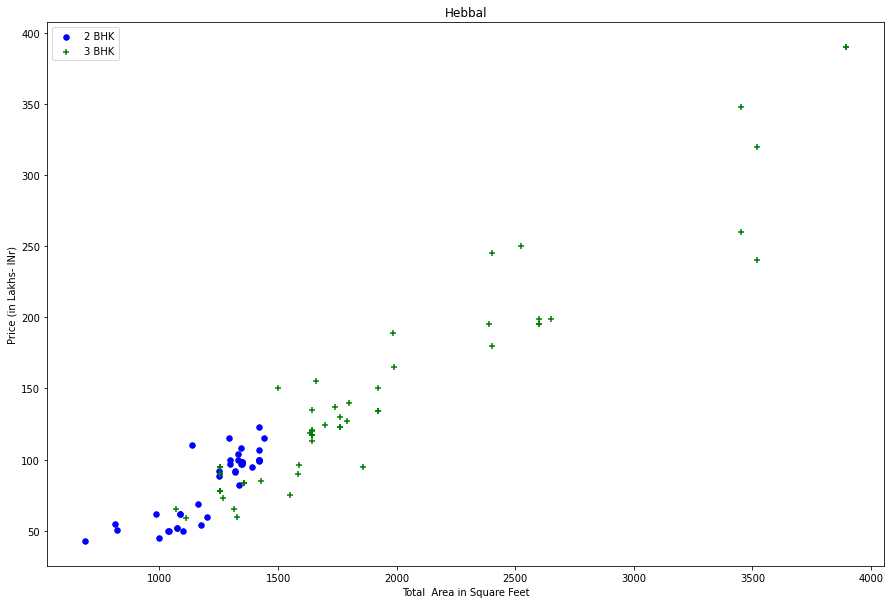

In [38]:
plot_scatter_chart(df7,"Hebbal")

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

(4775, 11)

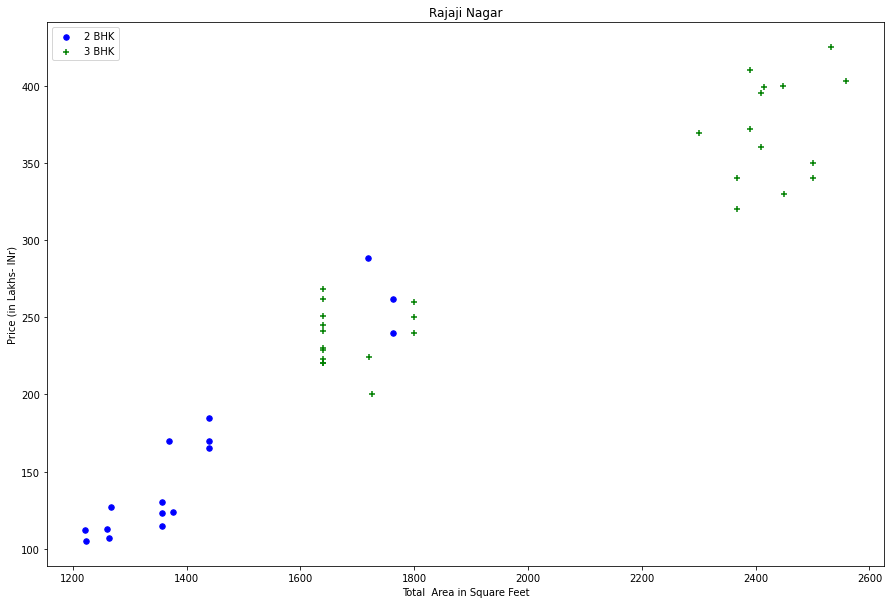

In [40]:
plot_scatter_chart(df8,"Rajaji Nagar")

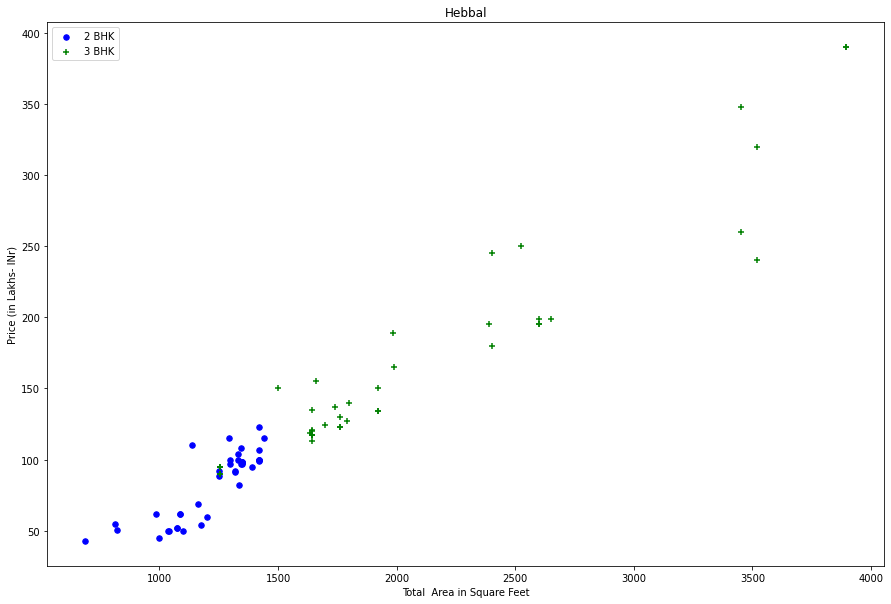

In [41]:
plot_scatter_chart(df8,"Hebbal")


Text(0, 0.5, 'Count')

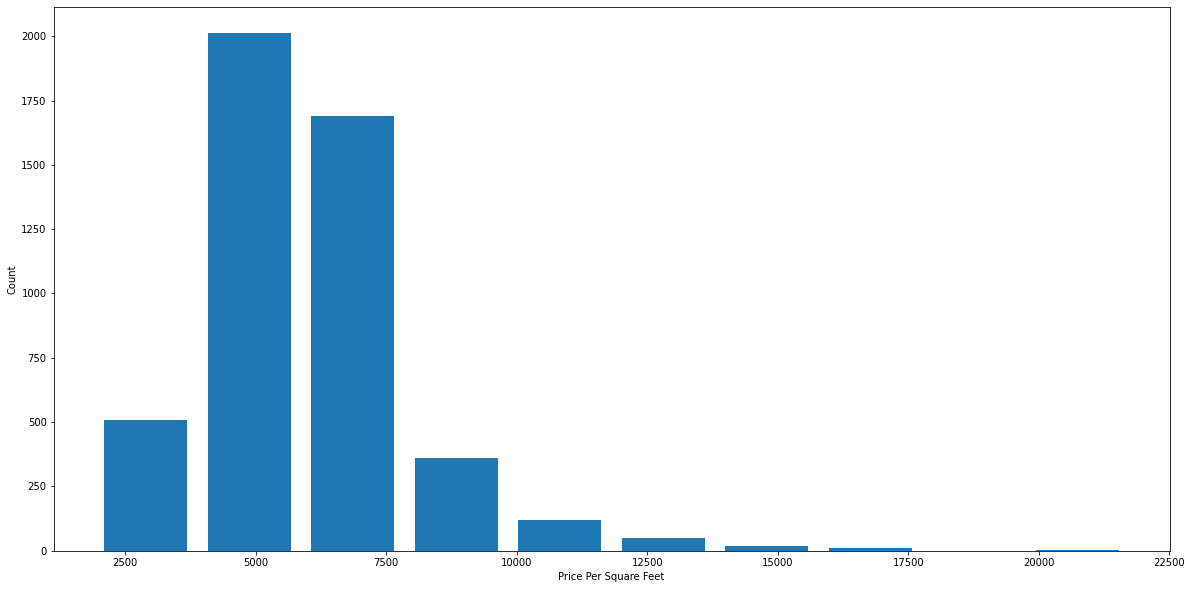

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df8.bath.unique()


array([4., 3., 2., 5., 1., 6., 7., 9.])

Text(0, 0.5, 'Count')

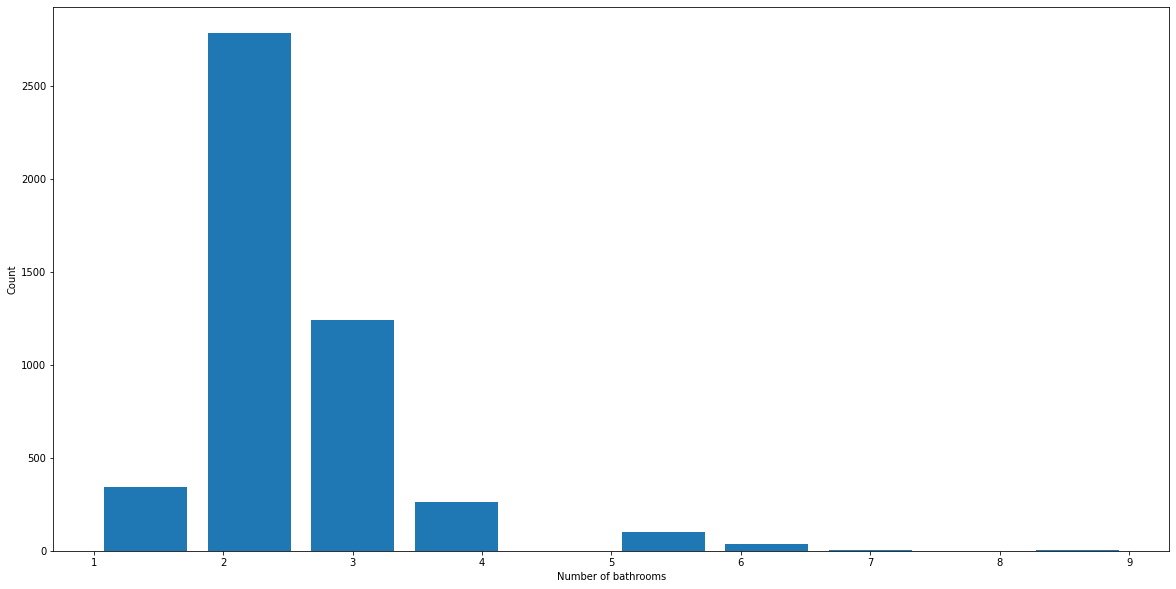

In [44]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [45]:

# print(type(df8.bath[3]))
df8[df8.bath>10]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft


In [46]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(4718, 11)

In [47]:
df9.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,4,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,3,8906.666667


In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2065.0,4.0,1.0,210.0,3


In [49]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2825.0,4.0,3.0,250.0,4,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,1875.0,3.0,1.0,167.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,Prhtsok,2065.0,4.0,1.0,210.0,3,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,1st Phase JP Nagar,NCaveun,1394.0,2.0,1.0,100.0,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-May,1st Phase JP Nagar,Inntsth,1077.0,2.0,2.0,93.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,area_type,availability,society,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,Prhtsok,2825.0,4.0,3.0,250.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,Prhtsok,1875.0,3.0,1.0,167.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


Building a model

In [52]:

X = df12.drop(['price','area_type','availability','society'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,3.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,1.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TRY TO USE OTHER CATEGORICAL DATA to fit multiple regression based on society or cluster and fit regression curve 

In [53]:
# print(len(X['area_type'].unique()))
# print(len(X['availability'].unique()))
# print(len(X['society'].unique()))
# print(len(X['area_type'].unique()))

In [54]:
y=df12['price']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [56]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8970387352344412

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87952913, 0.88780706, 0.90502609, 0.86970041, 0.8909853 ])

In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.886610,{'normalize': False}
1,lasso,0.801907,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.868066,"{'criterion': 'mse', 'splitter': 'random'}"


In [59]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [60]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

104.78082953674578

In [61]:
predict_price('Indira Nagar',1000, 2, 2)

138.77509502226854

In [62]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [63]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))